# Analise de dados sobre o sono entre os Mamíferos

## Sumário


### Principais Descobertas da Análise de Dados

*   A limpeza de dados envolveu a substituição dos valores '?' por `NaN` e a conversão das colunas `max_life_span`, `gestation_time` e `total_sleep` para o tipo de dado numérico (float).

*   A expectativa de vida média dos mamíferos no conjunto de dados foi de aproximadamente **19,88 anos**.
*   Mamíferos com um índice de predação mais alto (mais propensos a serem predados) tendem a ter um índice de exposição ao sono mais alto, o que significa que dormem em ambientes mais expostos.
*   Foi observada uma tendência de que mamíferos com um índice de perigo mais alto (predadores vorazes) possuem uma massa cerebral maior.
*   Existe uma correlação forte e direta entre o `body_weight` (peso corporal) e o `brain_weight` (peso cerebral) dos mamíferos.
*   Mamíferos que dormem em ambientes menos expostos (menor `sleep_exposure_index`) geralmente apresentam uma duração média de sono mais longa.


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') #ignora as mensagens de aviso

import kagglehub

# Download latest version
path = kagglehub.dataset_download("mathurinache/sleep-dataset")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'sleep-dataset' dataset.
Path to dataset files: /kaggle/input/sleep-dataset


## Análise exploratória de Dados

In [18]:
# carregando o dataset
data = pd.read_csv("/kaggle/input/sleep-dataset/dataset_2191_sleep.csv")
# carregando os 5 primeiros elementos
data.head()

,body_weight,brain_weight,max_life_span,gestation_time,predation_index,sleep_exposure_index,danger_index,total_sleep
0,6654.000,5712.0,38.6,645,3,5,3,3.3
1,1.000,6.6,4.5,42,3,1,3,8.3
2,3.385,44.5,14,60,1,1,1,12.5
3,0.920,5.7,?,25,5,2,3,16.5
4,2547.000,4603.0,69,624,3,5,4,3.9


In [19]:
# Mostrando as informações dos elementos do dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   body_weight           62 non-null     float64
 1   brain_weight          62 non-null     float64
 2   max_life_span         62 non-null     object 
 3   gestation_time        62 non-null     object 
 4   predation_index       62 non-null     int64  
 5   sleep_exposure_index  62 non-null     int64  
 6   danger_index          62 non-null     int64  
 7   total_sleep           62 non-null     object 
dtypes: float64(2), int64(3), object(3)
memory usage: 4.0+ KB


In [20]:
# tamanho do dataset (Linhas e Colunas)
data.shape

(62, 8)

In [21]:
# descreve as estatísticas de forma resumida
data.describe()

,body_weight,brain_weight,predation_index,sleep_exposure_index,danger_index
count,62.000000,62.000000,62.000000,62.000000,62.000000
mean,198.789984,283.134194,2.870968,2.419355,2.612903
std,899.158011,930.278942,1.476414,1.604792,1.441252
min,0.005000,0.140000,1.000000,1.000000,1.000000
25%,0.600000,4.250000,2.000000,1.000000,1.000000
50%,3.342500,17.250000,3.000000,2.000000,2.000000
75%,48.202500,166.000000,4.000000,4.000000,4.000000
max,6654.000000,5712.000000,5.000000,5.000000,5.000000


## Limpeza de Dados

In [33]:
data['max_life_span'] = data['max_life_span'].replace('?', np.nan)
data['gestation_time'] = data['gestation_time'].replace('?', np.nan).astype(float)
data['total_sleep'] = data['total_sleep'].replace('?', np.nan).astype(float)
data.head()

,body_weight,brain_weight,max_life_span,gestation_time,predation_index,sleep_exposure_index,danger_index,total_sleep
0,6654.000,5712.0,38.6,645.0,3,5,3,3.3
1,1.000,6.6,4.5,42.0,3,1,3,8.3
2,3.385,44.5,14.0,60.0,1,1,1,12.5
3,0.920,5.7,NaN,25.0,5,2,3,16.5
4,2547.000,4603.0,69.0,624.0,3,5,4,3.9


## Visualização de Variáveis Numéricas

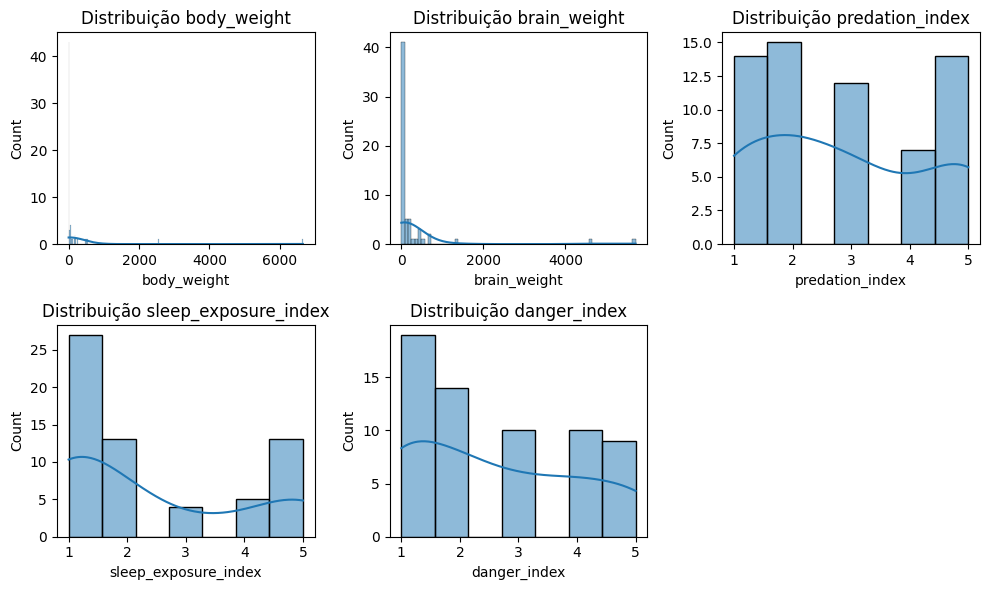

In [23]:
plt.figure(figsize=(10, 6))
coluna_numerica = data.select_dtypes(include='number').columns
for i, col in enumerate(coluna_numerica):
    plt.subplot(2, 3, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribuição {col}')
plt.tight_layout()
plt.show()

## Visualização de Expectativa de vida


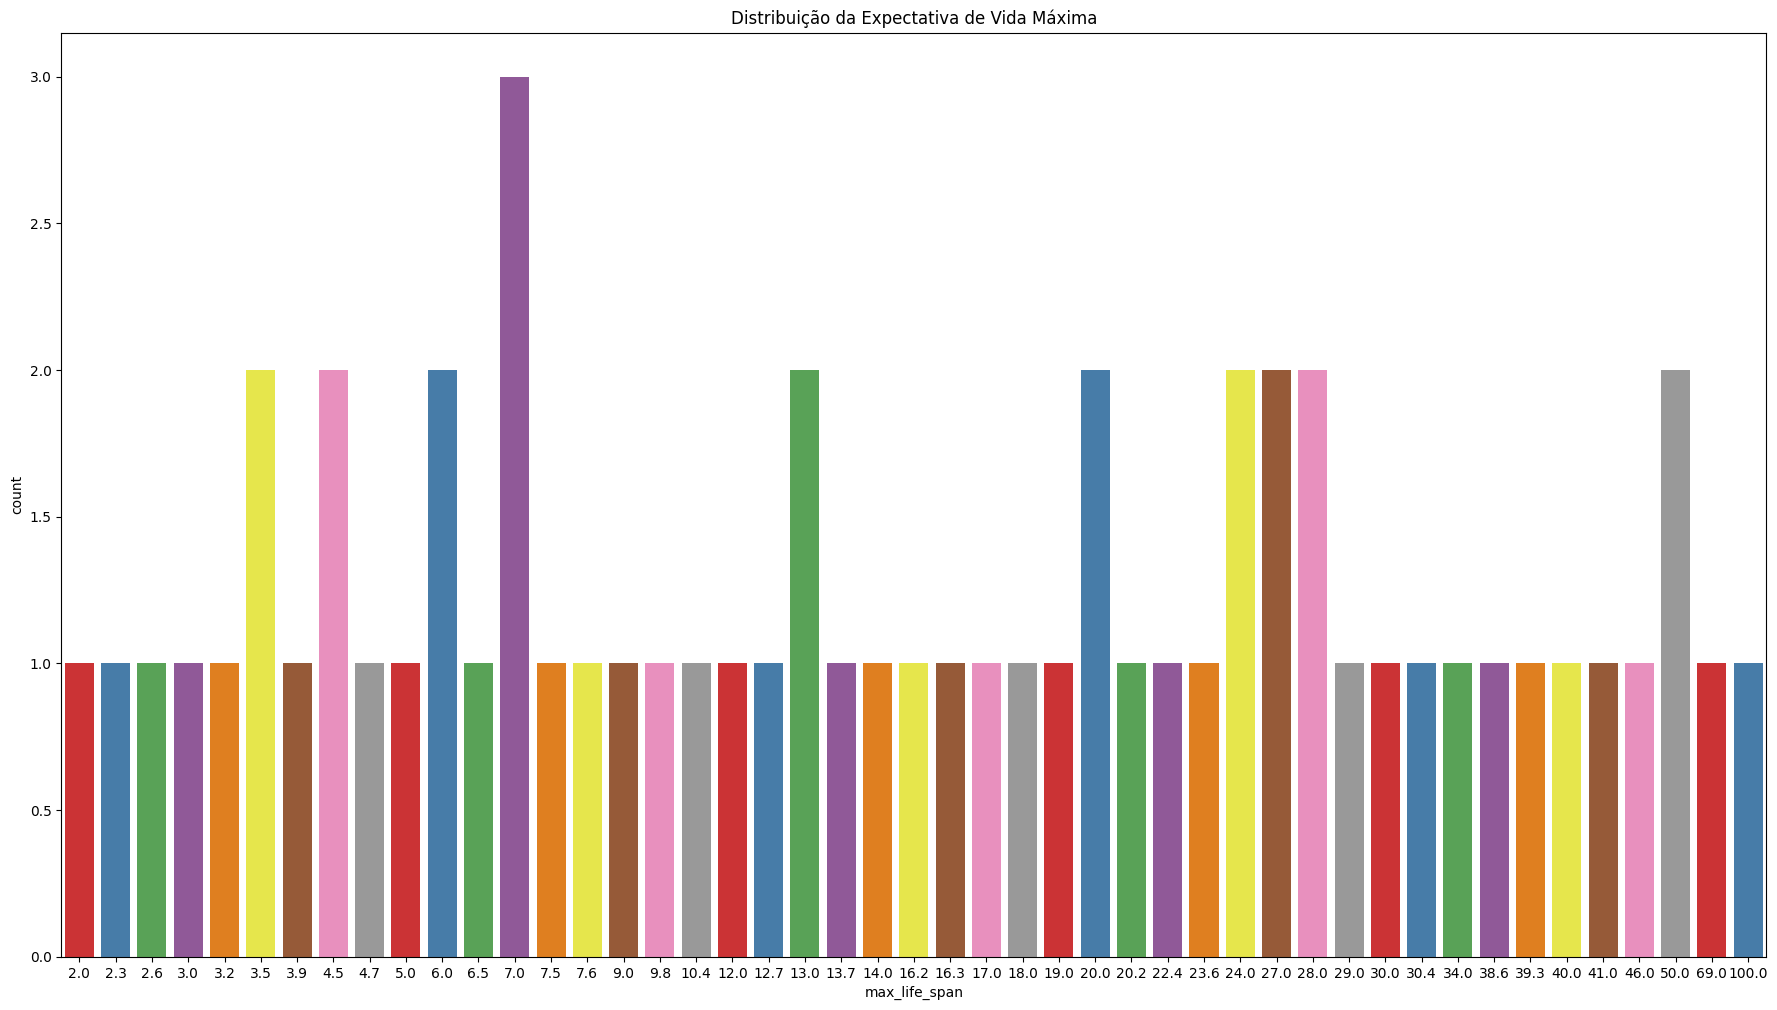

In [37]:
plt.figure(figsize=(22, 12))
sns.countplot(x='max_life_span', data=data, width=0.8, palette='Set1');
plt.title('Distribuição da Expectativa de Vida Máxima');

In [29]:
data['max_life_span'] = pd.to_numeric(data['max_life_span'])
media = data['max_life_span'].mean()
print(f'A Média de expectativa de Vida da população é: {media:.2f}')

A Média de expectativa de Vida da população é: 19.88


## Distribuição do índicie de Predação e Sono em ambiente exposto


#### A Relação entre animais se estabelece pelo fato de que mamíferos com maior chances de serem predados acabam dormindo em locais mais exposto. Em contrapartida, predadores, isto é, animais cujo índice de predação é baixo, tende a serem cauteloso e dormirem em ambientes menos expostos evitando qualquer infortúnio.

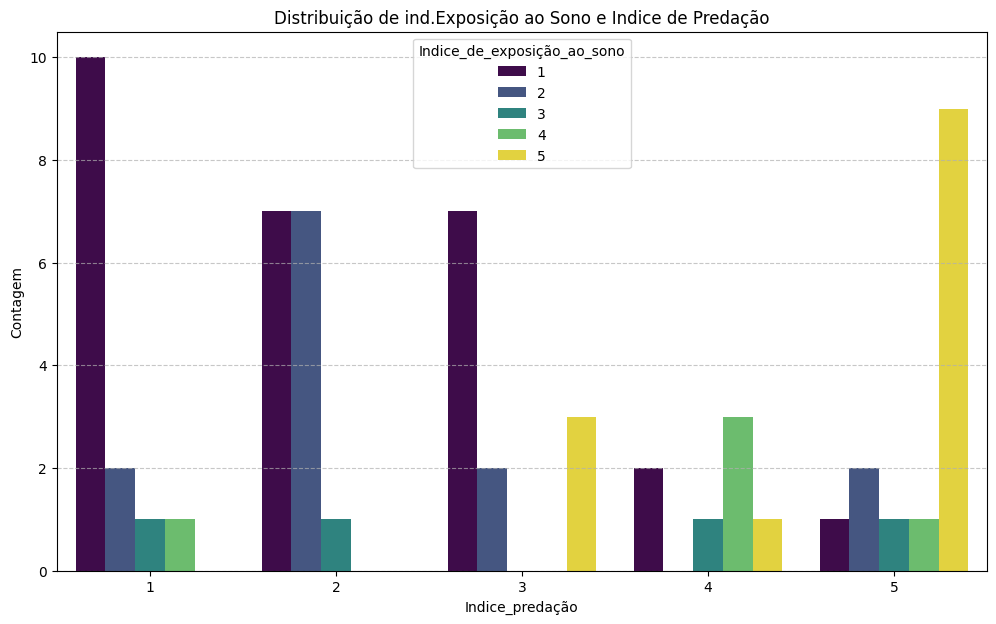

In [30]:

plt.figure(figsize=(12, 7))
sns.countplot(data=data, x='predation_index', hue='sleep_exposure_index', palette='viridis')
plt.title('Distribuição de ind.Exposição ao Sono e Indice de Predação')
plt.xlabel('Indice_predação')
plt.ylabel('Contagem')
plt.legend(title='Indice_de_exposição_ao_sono')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# índice de predação (1-5) 1 = mínimo (menos provável de ser pregado sobre) 5 = máximo (mais provável de ser predado sobre)
# índice de exposição ao sono (1-5) 1 = menos exposto (por exemplo, animal dorme em um ambiente bem protegido) 5 = mais exposto

## Relação entre Massa cerebral e Perigo do Animal


#### Analisando o plot abaixo é possível inferir que mamíferos mais perigoso, ou seja, predadores vorazes possuem massa cerebral maior. Dessa maneira, pode-se concluir que o tamanho do cérebro resulta em mamiferos mais inteligentes e capazes de gerar estratégias de predação.

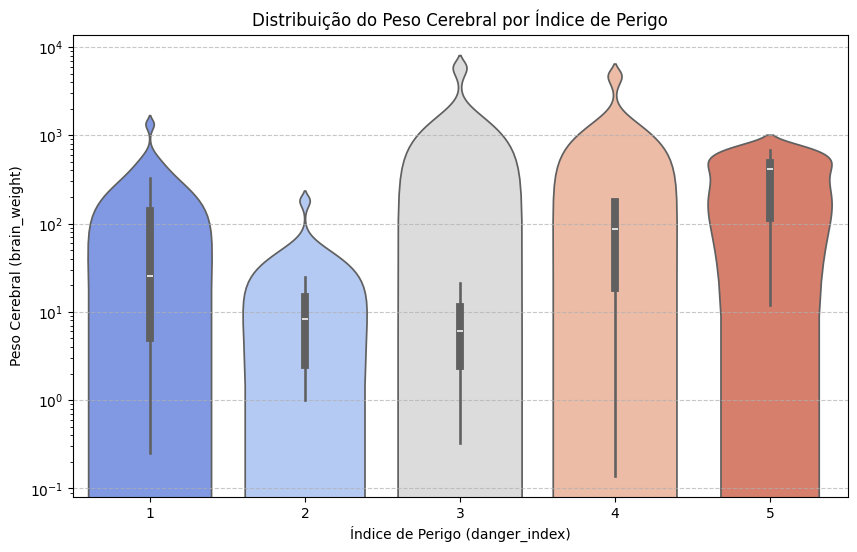

In [27]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='danger_index', y='brain_weight', data=data, palette='coolwarm')
plt.title('Distribuição da Massa Cerebral por Índice de Perigo')
plt.xlabel('Índice de Perigo (danger_index)')
plt.ylabel('Peso Cerebral (brain_weight)')
plt.yscale('log') # Usando escala logarítmica para melhor visualização do peso cerebral
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Este box plot mostra a distribuição do `brain_weight` (peso cerebral) para cada `danger_index` (índice de perigo). Para cada caixa:
- A linha central representa a mediana.
- As bordas da caixa representam o primeiro (Q1) e o terceiro (Q3) quartis.
- Os 'bigodes' (whiskers) estendem-se aos valores mínimo e máximo dentro de 1.5 vezes o Intervalo Interquartil (IQR).
- Pontos fora dos bigodes são considerados valores atípicos.

Este gráfico de barras agrupadas mostra a frequência de cada `predation_index`, com as barras divididas pelas diferentes categorias de `sleep_exposure_index`. Isso permite comparar visualmente como a distribuição do `sleep_exposure_index` varia dentro de cada nível de `predation_index`.

## Relação entre Peso e massa Cerebral entre Mamíferos

#### Uma conclusão um tanto óbvia mais que fica evidente com o gráfico abaixo, está no fato de que o peso de um mamífero está diretamente relacionado com o sua massa corporal.

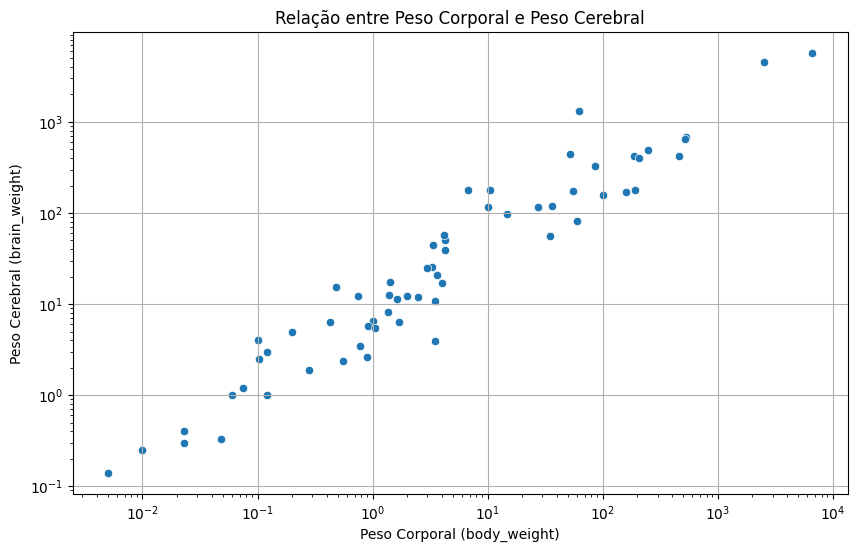

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='body_weight', y='brain_weight', data=data)
plt.title('Relação entre Peso Corporal e Peso Cerebral')
plt.xlabel('Peso Corporal (body_weight)')
plt.ylabel('Peso Cerebral (brain_weight)')
plt.xscale('log') # Usando escala logarítmica para melhor visualização devido à grande variação de valores
plt.yscale('log') # Usando escala logarítmica para melhor visualização
plt.grid(True)
plt.show()

## Horas de Sono em relação a Exposição do Ambiente
#### Os mamíferos que mais dormem são aqueles cujo índice de exposição é mais baixo. Significa a dizer que o sono médio é maior em mamíferos que dormem em ambientes menos exposto.

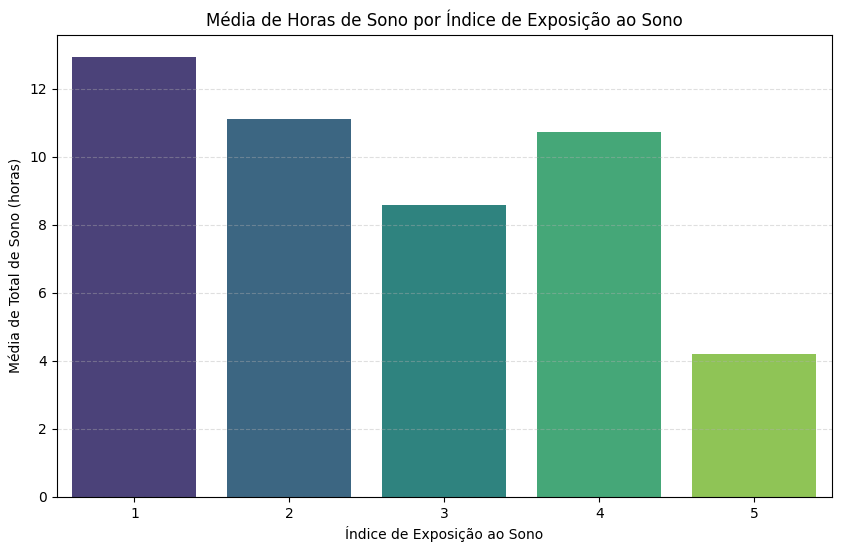

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x='sleep_exposure_index', y='total_sleep', data=data.groupby('sleep_exposure_index')['total_sleep'].mean().reset_index(), palette='viridis')
plt.title('Média de Horas de Sono por Índice de Exposição ao Sono')
plt.xlabel('Índice de Exposição ao Sono')
plt.ylabel('Média de Total de Sono (horas)')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

## Heatmap de Correlação entre as Varíáveis Numéricas

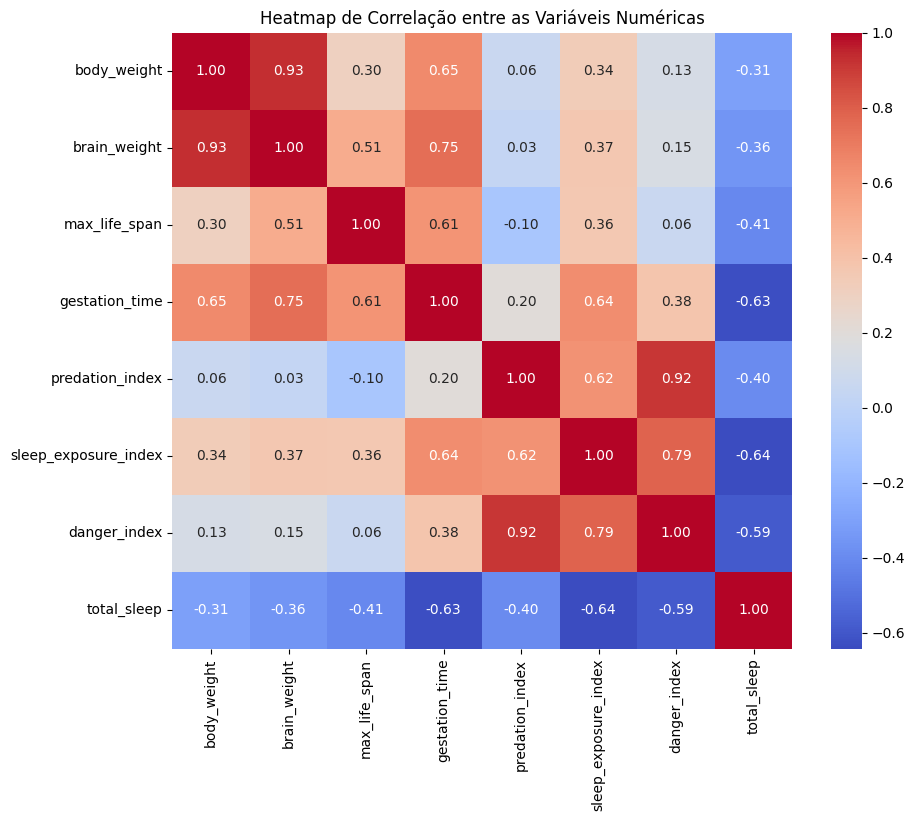

In [ ]:

# Selecionar apenas colunas numéricas para o cálculo da correlação
numeric_data = data.select_dtypes(include=[np.number])

# Calcular a matriz de correlação
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlação entre as Variáveis Numéricas')
plt.show()

## **Insights**

*   As descobertas destacam uma relação de troca entre segurança e duração do sono, onde ambientes de sono menos expostos se correlacionam com o aumento das horas de sono, enquanto um alto risco de predação está associado a um sono mais exposto.
*   Investigações adicionais poderiam explorar as relações causais ou as pressões evolutivas subjacentes que impulsionam as correlações observadas, particularmente entre a massa cerebral, as características da história de vida e os padrões de sono.